In [13]:
import pandas as pd

df = pd.read_csv('AMZN.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6632,2023-09-22,131.110001,132.029999,128.520004,129.119995,129.119995,59859500
6633,2023-09-25,129.360001,131.779999,128.770004,131.270004,131.270004,46017800
6634,2023-09-26,130.119995,130.389999,125.279999,125.980003,125.980003,73048200
6635,2023-09-27,125.760002,127.480003,124.129997,125.980003,125.980003,66553400


In [14]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354
...,...,...
6632,2023-09-22,129.119995
6633,2023-09-25,131.270004
6634,2023-09-26,125.980003
6635,2023-09-27,125.980003


In [15]:
df['Date']

0       1997-05-15
1       1997-05-16
2       1997-05-19
3       1997-05-20
4       1997-05-21
           ...    
6632    2023-09-22
6633    2023-09-25
6634    2023-09-26
6635    2023-09-27
6636    2023-09-28
Name: Date, Length: 6637, dtype: object

In [16]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1997-05-15')
datetime_object

datetime.datetime(1997, 5, 15, 0, 0)

In [17]:
df

,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354
...,...,...
6632,2023-09-22,129.119995
6633,2023-09-25,131.270004
6634,2023-09-26,125.980003
6635,2023-09-27,125.980003


In [18]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\hp\AppData\Local\Temp\ipykernel_20148\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1997-05-15
1      1997-05-16
2      1997-05-19
3      1997-05-20
4      1997-05-21
          ...    
6632   2023-09-22
6633   2023-09-25
6634   2023-09-26
6635   2023-09-27
6636   2023-09-28
Name: Date, Length: 6637, dtype: datetime64[ns]

In [19]:
df.index = df.pop('Date')
df

,Close
Date,
1997-05-15,0.097917
1997-05-16,0.086458
1997-05-19,0.085417
1997-05-20,0.081771
1997-05-21,0.071354
...,...
2023-09-22,129.119995
2023-09-25,131.270004
2023-09-26,125.980003


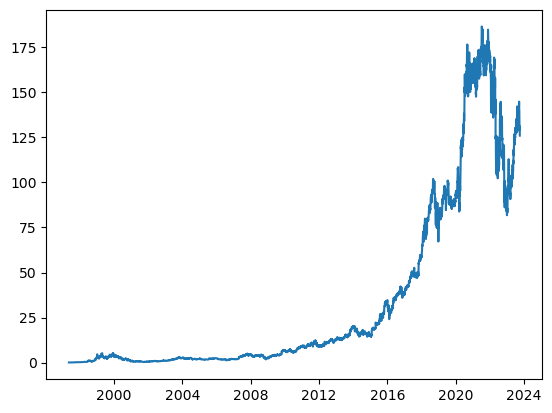

In [20]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [31]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df, 
                                '2022-05-09', 
                                '2023-09-28', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-05-09,125.928497,116.406998,114.772499,108.789001
1,2022-05-10,116.406998,114.772499,108.789001,108.859001
2,2022-05-11,114.772499,108.789001,108.859001,105.372002
3,2022-05-12,108.789001,108.859001,105.372002,106.930496
4,2022-05-13,108.859001,105.372002,106.930496,113.055000
...,...,...,...,...,...
345,2023-09-22,137.630005,135.289993,129.330002,129.119995
346,2023-09-25,135.289993,129.330002,129.119995,131.270004
347,2023-09-26,129.330002,129.119995,131.270004,125.980003
348,2023-09-27,129.119995,131.270004,125.980003,125.980003


In [32]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((350,), (350, 3, 1), (350,))

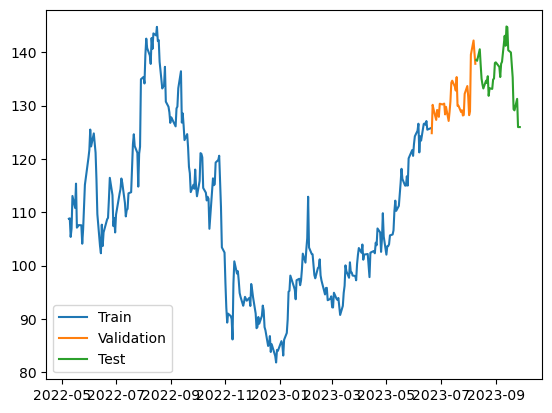

In [33]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
9/9 [==============================] - 3s 72ms/step - loss: 11891.8135 - mean_absolute_error: 108.0610 - val_loss: 16920.2031 - val_mean_absolute_error: 130.0198
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 11742.9004 - mean_absolute_error: 107.3686 - val_loss: 16743.8340 - val_mean_absolute_error: 129.3398
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 11563.6094 - mean_absolute_error: 106.5243 - val_loss: 16478.4180 - val_mean_absolute_error: 128.3095
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 11288.4365 - mean_absolute_error: 105.2133 - val_loss: 16062.2129 - val_mean_absolute_error: 126.6772
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 10870.4414 - mean_absolute_error: 103.2014 - val_loss: 15447.1396 - val_mean_absolute_error: 124.2252
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 10133.6387 - mean_absolute_error: 99.5642 - val_loss: 14198.140

9/9 [==============================] - 0s 8ms/step - loss: 9.4981 - mean_absolute_error: 2.3653 - val_loss: 7.8228 - val_mean_absolute_error: 2.0805


9/9 [==============================] - 0s 1ms/step


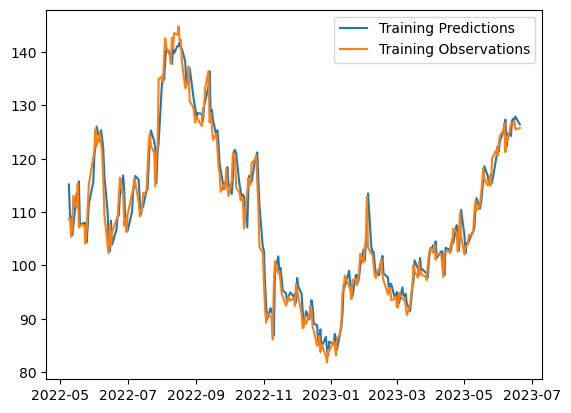

In [35]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 3ms/step


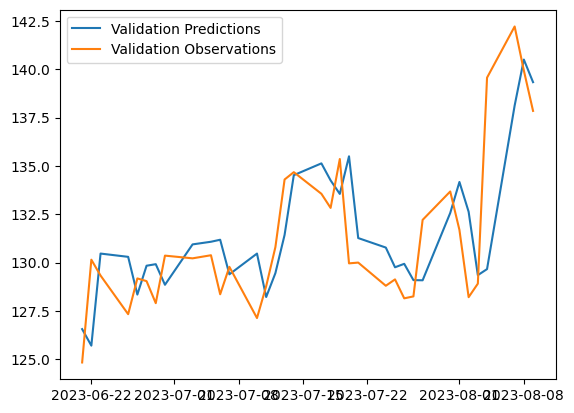

In [36]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 2ms/step


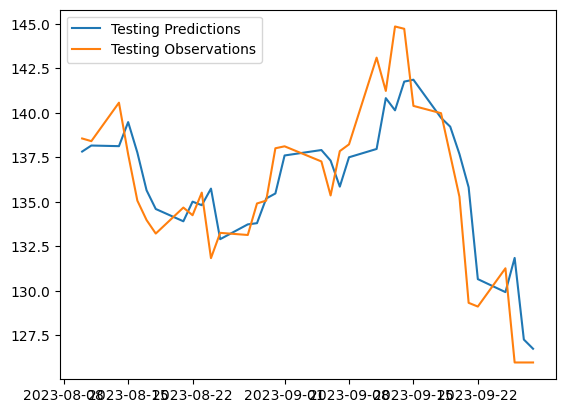

In [37]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

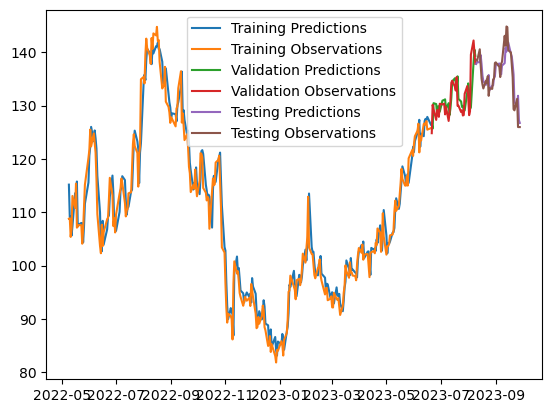

In [38]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [39]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 28ms/step


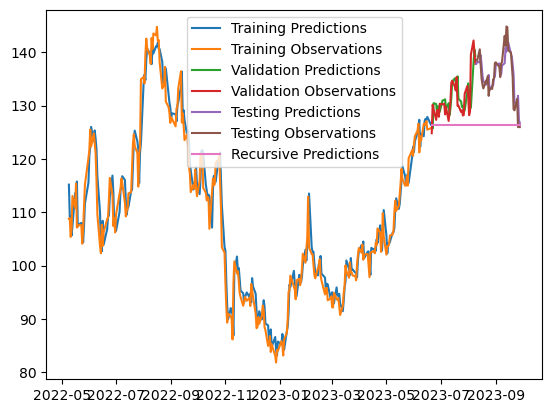

In [40]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])